In [1]:
!pip install --upgrade pandas numpy matplotlib


In [2]:
import os
from google.colab import files

# Make sure folder exists
!mkdir -p /mnt/data

# Upload dataset
uploaded = files.upload()

# Move uploaded file to /mnt/data/ with fixed name
for fn in uploaded.keys():
    os.rename(fn, "/mnt/data/Netflix_Dataset.csv")

print("Dataset uploaded successfully!")


Saving Netflix Dataset (1).csv to Netflix Dataset (1).csv
Dataset uploaded successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [29]:
# Load data
df = pd.read_csv("/mnt/data/Netflix_Dataset.csv")

# Clean column names
df.columns = [c.strip().lower() for c in df.columns]

# Add release year
if "release_year" in df.columns:
    df["year"] = pd.to_numeric(df["release_year"], errors="coerce")
elif "release_date" in df.columns:
    df["year"] = pd.to_datetime(df["release_date"], errors="coerce").dt.year
else:
    df["year"] = np.nan

# Handle genres
if "type" in df.columns:
    df["genres_list"] = df["type"].fillna("").apply(lambda x: [g.strip() for g in x.split(",") if g.strip()]) # Added check for empty strings after strip
else:
    df["genres_list"] = [[] for _ in range(len(df))]

# Handle countries
if "country" in df.columns:
    df["country_list"] = df["country"].fillna("").apply(lambda x: [c.strip() for c in x.split(",") if c.strip()]) # Added check for empty strings after strip
else:
    df["country_list"] = [[] for _ in range(len(len(df)))]

df.head()

,show_id,category,title,director,cast,country,release_date,rating,duration,type,description,year,genres_list,country_list
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,"[International TV Shows, TV Dramas, TV Sci-Fi ...",[Brazil]
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,"[Dramas, International Movies]",[Mexico]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,"[Horror Movies, International Movies]",[Singapore]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,"[Action & Adventure, Independent Movies, Sci-F...",[United States]
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,[Dramas],[United States]


In [25]:
df.columns

Index(['show_id', 'category', 'title', 'director', 'cast', 'country',
       'release_date', 'rating', 'duration', 'type', 'description', 'year',
       'genres_list', 'country_list'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns)


Index(['show_id', 'category', 'title', 'director', 'cast', 'country',
       'release_date', 'rating', 'duration', 'type', 'description', 'year',
       'genres_list', 'country_list'],
      dtype='object')


In [19]:
# Only keep valid rows
valid_df = df.dropna(subset=["category", "title", "year"])

# Convert year to integer
valid_df["year"] = valid_df["year"].astype(int)

# Group by year and category
type_year = valid_df.groupby(["year", "category"])["title"].count().unstack(fill_value=0)

# Check data
print(type_year.head())

category  Movie  TV Show
year                    
2008          1        1
2009          2        0
2010          1        0
2011         13        0
2012          3        0


/tmp/ipython-input-2615754559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df["year"] = valid_df["year"].astype(int)


<Figure size 1000x600 with 0 Axes>

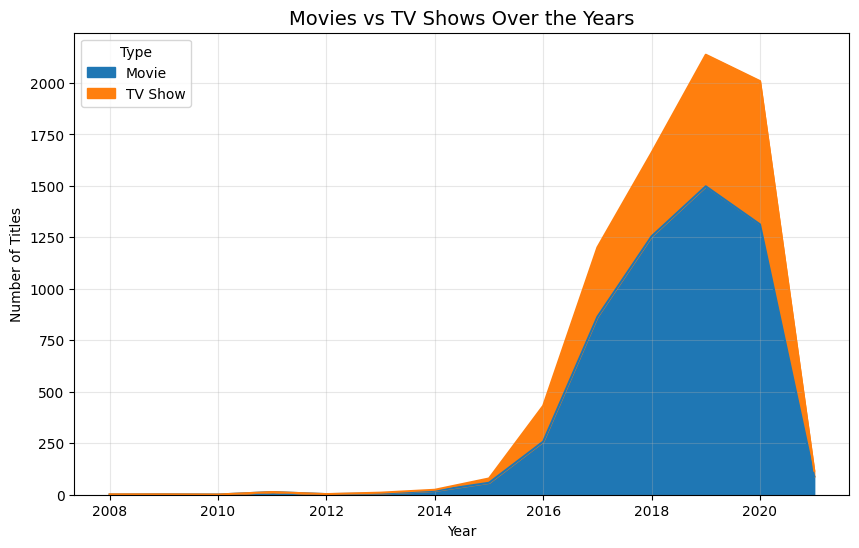

In [20]:
plt.figure(figsize=(10,6))
type_year.plot(kind='area', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])
plt.title("Movies vs TV Shows Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.grid(alpha=0.3)
plt.show()

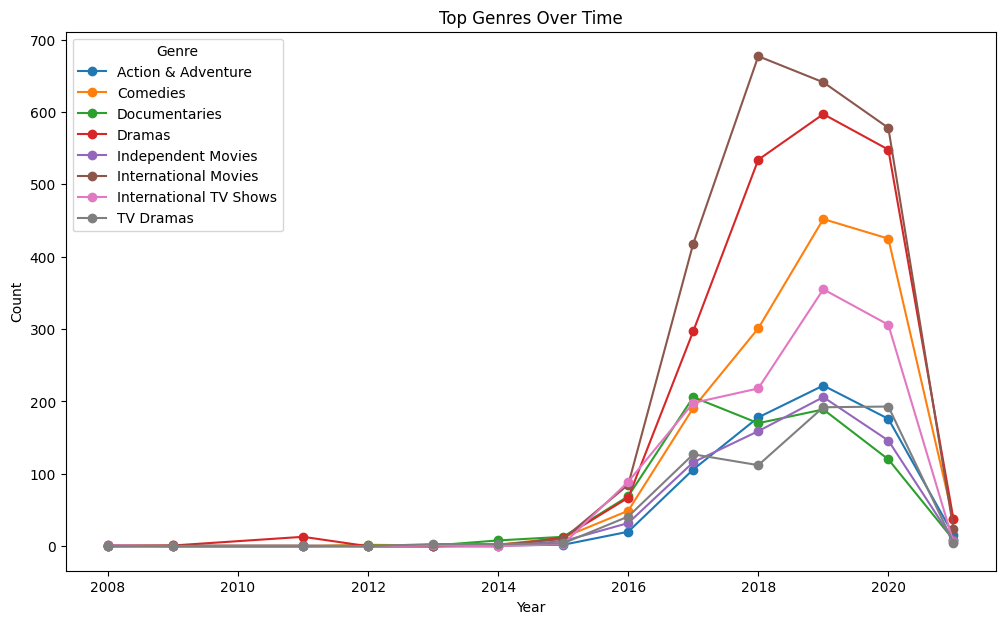

genre,Action & Adventure,Comedies,Documentaries,Dramas,Independent Movies,International Movies,International TV Shows,TV Dramas
year,,,,,,,,
2017.0,106,191,206,297,116,418,198,127
2018.0,178,301,170,534,159,677,218,112
2019.0,222,452,189,597,206,641,355,192
2020.0,176,425,120,548,146,578,306,193
2021.0,16,37,9,38,8,24,6,5


In [31]:
# Find top 8 genres overall
all_genres = Counter()
for g_list in df["genres_list"]:
    all_genres.update(g_list)
top_genres = [g for g, _ in all_genres.most_common(8)]

# Create year-genre dataframe
records = []
for _, row in df.dropna(subset=["year"]).iterrows():
    for g in row["genres_list"]:
        if g in top_genres:
            records.append((row["year"], g))

genre_df = pd.DataFrame(records, columns=["year","genre"])
genre_year = genre_df.groupby(["year","genre"]).size().unstack(fill_value=0)

# Plot
genre_year.plot(figsize=(12,7), marker="o")
plt.title("Top Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()

genre_year.tail()

In [30]:
print(df['type'].value_counts())

type
Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Docuseries, Science & Nature TV, TV Action & Adventure           1
British TV Shows, Classic & Cult TV, Kids' TV                    1
Docuseries, TV Sci-Fi & Fantasy                                  1
Children & Family Movies, Dramas, Music & Musicals               1
Name: count, Length: 492, dtype: int64


In [28]:
print(genre_year)

Empty DataFrame
Columns: []
Index: []


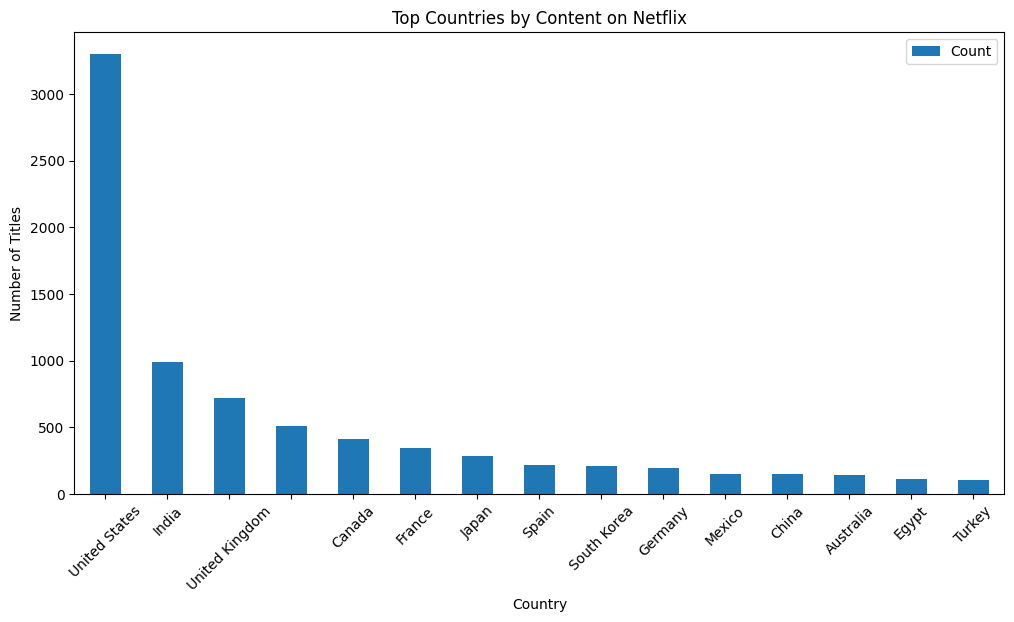

,Country,Count
0,United States,3298
1,India,990
2,United Kingdom,723
3,,511
4,Canada,412
5,France,349
6,Japan,287
7,Spain,215
8,South Korea,212
9,Germany,199


In [23]:
country_counter = Counter()
for c_list in df["country_list"]:
    country_counter.update(c_list)

country_df = pd.DataFrame(country_counter.most_common(15), columns=["Country","Count"])

# Plot
country_df.plot(kind="bar", x="Country", y="Count", figsize=(12,6))
plt.title("Top Countries by Content on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

country_df


In [32]:
recs = []

# Movies vs TV Shows
last_year = int(type_year.index.max())
last_counts = type_year.loc[last_year]
movies, shows = last_counts.get("Movie",0), last_counts.get("TV Show",0)
recs.append(f"In {last_year}, Netflix had {movies} Movies and {shows} TV Shows. Consider balancing investments if TV growth continues.")

# Genres
growth = {g: genre_year[g].iloc[-1] - genre_year[g].iloc[0] for g in genre_year.columns}
best_genre = max(growth, key=growth.get)
recs.append(f"Fastest growing genre: {best_genre}. Recommend producing more content in this category.")

# Countries
top_countries = country_df["Country"].head(5).tolist()
recs.append(f"Top contributing countries: {', '.join(top_countries)}. For expansion, focus on underrepresented regions with large audiences.")

# Show recommendations
for r in recs:
    print("- " + r)


- In 2021, Netflix had 88 Movies and 29 TV Shows. Consider balancing investments if TV growth continues.
- Fastest growing genre: Comedies. Recommend producing more content in this category.
- Top contributing countries: United States, India, United Kingdom, , Canada. For expansion, focus on underrepresented regions with large audiences.
